In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

In [33]:
db = 'tiagoal1_tracker_app'
ext = '.csv'
df_category = pd.read_csv(db +ext +'/'+db+'_table_Category'+ext)
df_user = pd.read_csv(db +ext+'/'+db+'_table_User'+ext)
df_type = pd.read_csv(db +ext+'/'+db+'_table_Type'+ext)
df_usercategory = pd.read_csv(db +ext+'/'+db+'_table_UserCategory'+ext)

In [34]:
username = 'Tiago'
user_idx = df_user['user_name'].loc[df_user['user_name'] == username].index[0]
user_id = df_user['user_id'][user_idx]
print('id of', username, 'is:',user_id)

id of Tiago is: 1


In [35]:
categories = list()
categories_id = list()
df_user = df_category.loc[df_category['user_id'] == user_id]
for category,id in zip(df_user['category_name'],df_user['category_id']):
    categories.append(category)
    categories_id.append(id)
    
print('Categories of',username,':\n',categories)
print(categories_id)

Categories of Tiago :
 ['Series', 'Gastos', 'Contas', 'Teste', 'Alimentação', 'Transporte']
[3, 6, 7, 8, 9, 10]


In [36]:
categories_with_type = []
types = list()
i=0
for each_id in categories_id:
    df_user = df_type.loc[df_type['category_id'] == each_id]

    types = []
    print('--------------')
    print('Category:',categories[i])
    # types.append(categories[i])
    for type,id in zip(df_user['type_name'],df_user['type_id']):
        types.append({
            "Category":categories[i],
            "Type":type,
            "id":id})
        # print(type)
    i+=1

    print(types)
    categories_with_type.append(types)
    
# print('Types of',username,':\n',categories_with_type)

--------------
Category: Series
[{'Category': 'Series', 'Type': 'Shield', 'id': 3}, {'Category': 'Series', 'Type': 'Orville', 'id': 9}]
--------------
Category: Gastos
[{'Category': 'Gastos', 'Type': 'Uber', 'id': 7}]
--------------
Category: Contas
[{'Category': 'Contas', 'Type': 'Dívidas', 'id': 8}]
--------------
Category: Teste
[{'Category': 'Teste', 'Type': nan, 'id': 10}]
--------------
Category: Alimentação
[{'Category': 'Alimentação', 'Type': 'Café', 'id': 11}, {'Category': 'Alimentação', 'Type': 'Café ', 'id': 14}]
--------------
Category: Transporte
[{'Category': 'Transporte', 'Type': 'Autocarro', 'id': 12}, {'Category': 'Transporte', 'Type': 'Autocarro ', 'id': 13}]


In [37]:
categories_with_type_with_values = []
types_with_values = []
values = list()
values_id = list()
i=0
category_idx = 0
for category_idx in range(len(categories_with_type)):
    print('--------------')


    values = []
    type_idx = 0
    for type_idx in range(len(categories_with_type[category_idx])):
        category = categories_with_type[category_idx][type_idx].get('Category')
        print('Category',category)
        type_id = categories_with_type[category_idx][type_idx].get('id')
        type_name = categories_with_type[category_idx][type_idx].get('Type')
        print('Type',type_name)

        df_user = df_usercategory.loc[df_usercategory['type_id'] == type_id]

        for value, date in zip(df_user['value'],df_user['date']):
            value_final = {
                "Category":category,
                "Type":type_name,
                "Value":value,
                "Date":date
                }
            values.append(value_final)
            # print(value_final)

        print(values)
        categories_with_type_with_values.append(values)
    
# print('Values of',username,':\n',categories_with_type_with_values)

--------------
Category Series
Type Shield
[{'Category': 'Series', 'Type': 'Shield', 'Value': 'Ep 10', 'Date': '2022-11-27 20:36:17'}, {'Category': 'Series', 'Type': 'Shield', 'Value': 'T1 Ep 11', 'Date': '2022-11-28 00:30:19'}, {'Category': 'Series', 'Type': 'Shield', 'Value': 'T1 Ep 12', 'Date': '2022-11-28 00:30:22'}, {'Category': 'Series', 'Type': 'Shield', 'Value': 'T1 Ep 13', 'Date': '2022-11-28 00:30:26'}, {'Category': 'Series', 'Type': 'Shield', 'Value': 'T1 Ep 14', 'Date': '2022-11-28 00:30:32'}]
Category Series
Type Orville
[{'Category': 'Series', 'Type': 'Shield', 'Value': 'Ep 10', 'Date': '2022-11-27 20:36:17'}, {'Category': 'Series', 'Type': 'Shield', 'Value': 'T1 Ep 11', 'Date': '2022-11-28 00:30:19'}, {'Category': 'Series', 'Type': 'Shield', 'Value': 'T1 Ep 12', 'Date': '2022-11-28 00:30:22'}, {'Category': 'Series', 'Type': 'Shield', 'Value': 'T1 Ep 13', 'Date': '2022-11-28 00:30:26'}, {'Category': 'Series', 'Type': 'Shield', 'Value': 'T1 Ep 14', 'Date': '2022-11-28 00:3

In [38]:
# category_idx = 0
# type_idx = 0
max_categories = len(categories_with_type_with_values)
max_values = [len(x) for x in categories_with_type_with_values]

categories = []
types = []
values = []
dates = []

for category_idx in range(len(categories_with_type_with_values)):
    print('Category_idx:',category_idx)
    for type_idx in range(len(categories_with_type_with_values[category_idx])):
        print('Type_idx:',type_idx)
        category = categories_with_type_with_values[category_idx][type_idx].get("Category")
        type = categories_with_type_with_values[category_idx][type_idx].get("Type")
        value = categories_with_type_with_values[category_idx][type_idx].get("Value")
        date = categories_with_type_with_values[category_idx][type_idx].get("Date")

        print(category)
        print(type)
        print(value)
        print(date)
        
        categories.append(category)
        types.append(type)
        values.append(value)
        dates.append(date)

# print(categories)
# print(types)
# print(values)
# print(dates)

user = {
    "Category": categories,
    "Type": types,
    "Value": values,
    "Date": dates
}

df = pd.DataFrame(user)

Category_idx: 0
Type_idx: 0
Series
Shield
Ep 10
2022-11-27 20:36:17
Type_idx: 1
Series
Shield
T1 Ep 11
2022-11-28 00:30:19
Type_idx: 2
Series
Shield
T1 Ep 12
2022-11-28 00:30:22
Type_idx: 3
Series
Shield
T1 Ep 13
2022-11-28 00:30:26
Type_idx: 4
Series
Shield
T1 Ep 14
2022-11-28 00:30:32
Type_idx: 5
Series
Orville
S2 E2
2022-11-29 00:50:07
Type_idx: 6
Series
Orville
S2 E3
2022-11-29 00:50:10
Type_idx: 7
Series
Orville
S2 E4
2022-11-29 00:50:15
Type_idx: 8
Series
Orville
S2 E5
2022-11-29 00:50:19
Type_idx: 9
Series
Orville
S2 E6
2022-11-29 00:52:14
Category_idx: 1
Type_idx: 0
Series
Shield
Ep 10
2022-11-27 20:36:17
Type_idx: 1
Series
Shield
T1 Ep 11
2022-11-28 00:30:19
Type_idx: 2
Series
Shield
T1 Ep 12
2022-11-28 00:30:22
Type_idx: 3
Series
Shield
T1 Ep 13
2022-11-28 00:30:26
Type_idx: 4
Series
Shield
T1 Ep 14
2022-11-28 00:30:32
Type_idx: 5
Series
Orville
S2 E2
2022-11-29 00:50:07
Type_idx: 6
Series
Orville
S2 E3
2022-11-29 00:50:10
Type_idx: 7
Series
Orville
S2 E4
2022-11-29 00:50:15


In [39]:
df['Date'] = pd.to_datetime(df['Date'])

In [109]:
print('**************')
print('User:',username)
print('--------------')
print('Categories:')
categories = df['Category'].unique()
print(categories)
# user_categories = []
# for each in categories:
#     if each not in user_categories:
#         user_categories.append(each)
#         print(each)
print('--------------')

# plt.plot(df[])

**************
User: Tiago
--------------
Categories:
['Series' 'Gastos' 'Contas' 'Teste' 'Alimentação' 'Transporte']
--------------


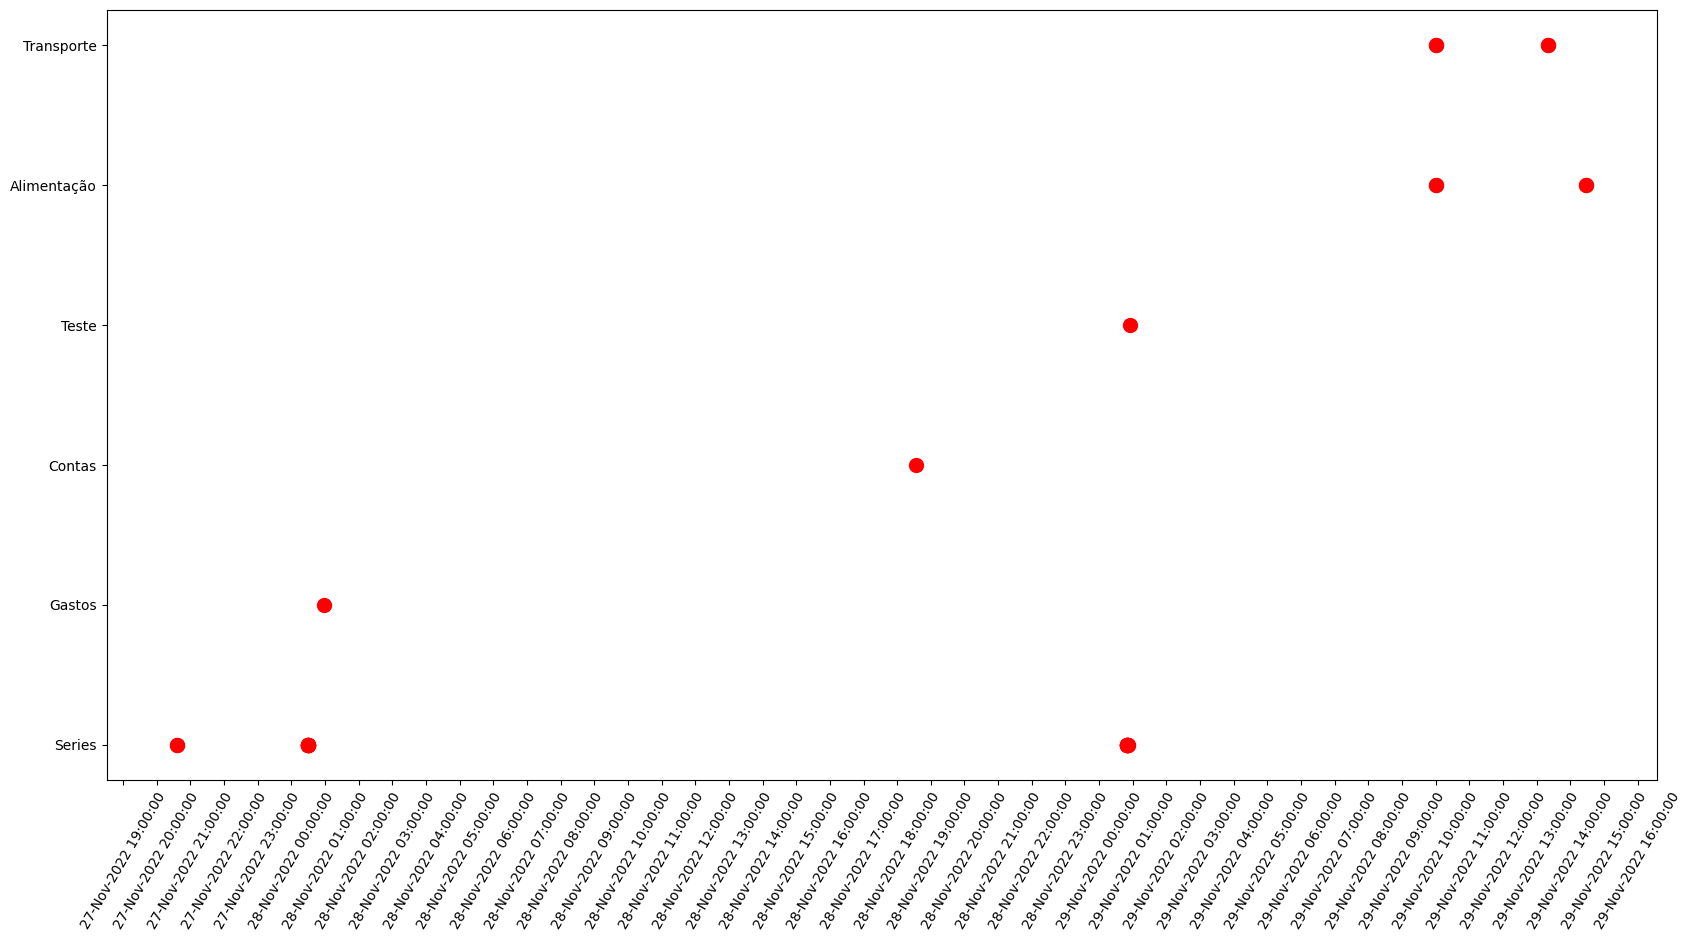

In [63]:
time = df['Date']
df_category = df['Category']

plt.figure(figsize=(20,10))
# plt.title(title)
dtFmt = mdates.DateFormatter('%d-%b-%Y %H:%M:%S')
ax = plt.axes()
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.gca().xaxis.set_major_locator(mdates.HourLocator())
# plt.gca().yaxis.set_major_locator(plt.MaxNLocator(50))
# plt.ylim(bottom=1)
plt.plot(df['Date'], df['Category'],'ro',markersize=10)
plt.xticks(rotation=60, fontweight='light')
# plt.xlim([pd.to_datetime('2018-06-10'),pd.to_datetime('2022-11-18')])
# plt.xlim([pd.to_datetime('2019-03-15'),pd.to_datetime('2019-03-22')])
plt.show()

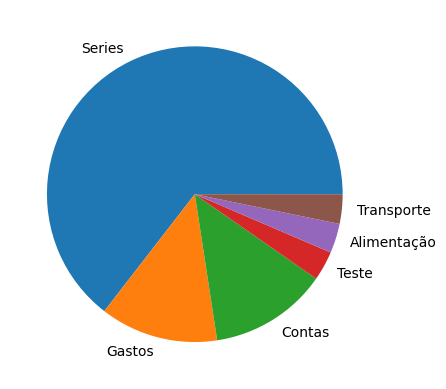

In [116]:
categories_freq = df['Category'].value_counts()
plt.pie(categories_freq,labels=categories)
plt.show()